In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import load_model
model=load_model('model1.h5')

In [2]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\ayush\AppData\Local\Temp\tmpcp1zmadl\assets


INFO:tensorflow:Assets written to: C:\Users\ayush\AppData\Local\Temp\tmpcp1zmadl\assets


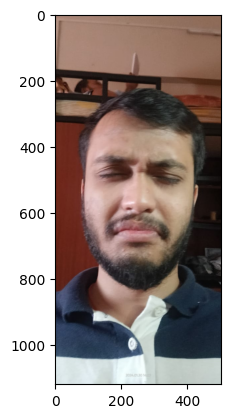

In [3]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("..\\Testing\\8.jpeg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
# Load the cascade classifier for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

# Process each detected face
for (x, y, w, h) in faces:
    # Crop the image to the specified coordinates
    face = img[y:y+h, x:x+w]

    # Convert the face to grayscale
    gray_face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

    # Resize the grayscale face to 54x54 pixels
    resized_gray_face = cv2.resize(gray_face, (48, 48))

    # Display the resized grayscale face
    # plt.imshow(resized_gray_face, cmap='gray')
    plt.show()

In [4]:
yhat=model.predict(np.expand_dims(resized_gray_face/255,0))
output=(np.argmax(yhat))
if(output==0):
    print('Angry Face Detected')
elif(output==1):
    print('Disgusted Face Detected')
elif(output==2):
    print('Feared Face Detected')
elif(output==3):
    print('Happy Face Detected')
elif(output==4):
    print('Neutral Face Detected')
elif(output==5):
    print('Sad Face Detected')
elif(output==6):
    print('Surprised Face Detected')

1/1 [==============================] - 7s 7s/step
Sad Face Detected
